### Notebook for the leiden clustering of all skin

- **Developed by:** Anna Maguza
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- **Date:** 27th of December 2023

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from SCCAF import SCCAF_assessment, plot_roc

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

### Read in Human skin dataset

In [3]:
adata_skin = sc.read_h5ad('data_skin/SCC0120_1_Skin_scANVI_states_Anna.h5ad') 
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'seed_labels', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropout_by_counts-SCC0120_1_sk

+ Save raw counts

In [4]:
adata_skin.raw = adata_skin

### Visualise manifold with `scANVI` annotation

/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Cat

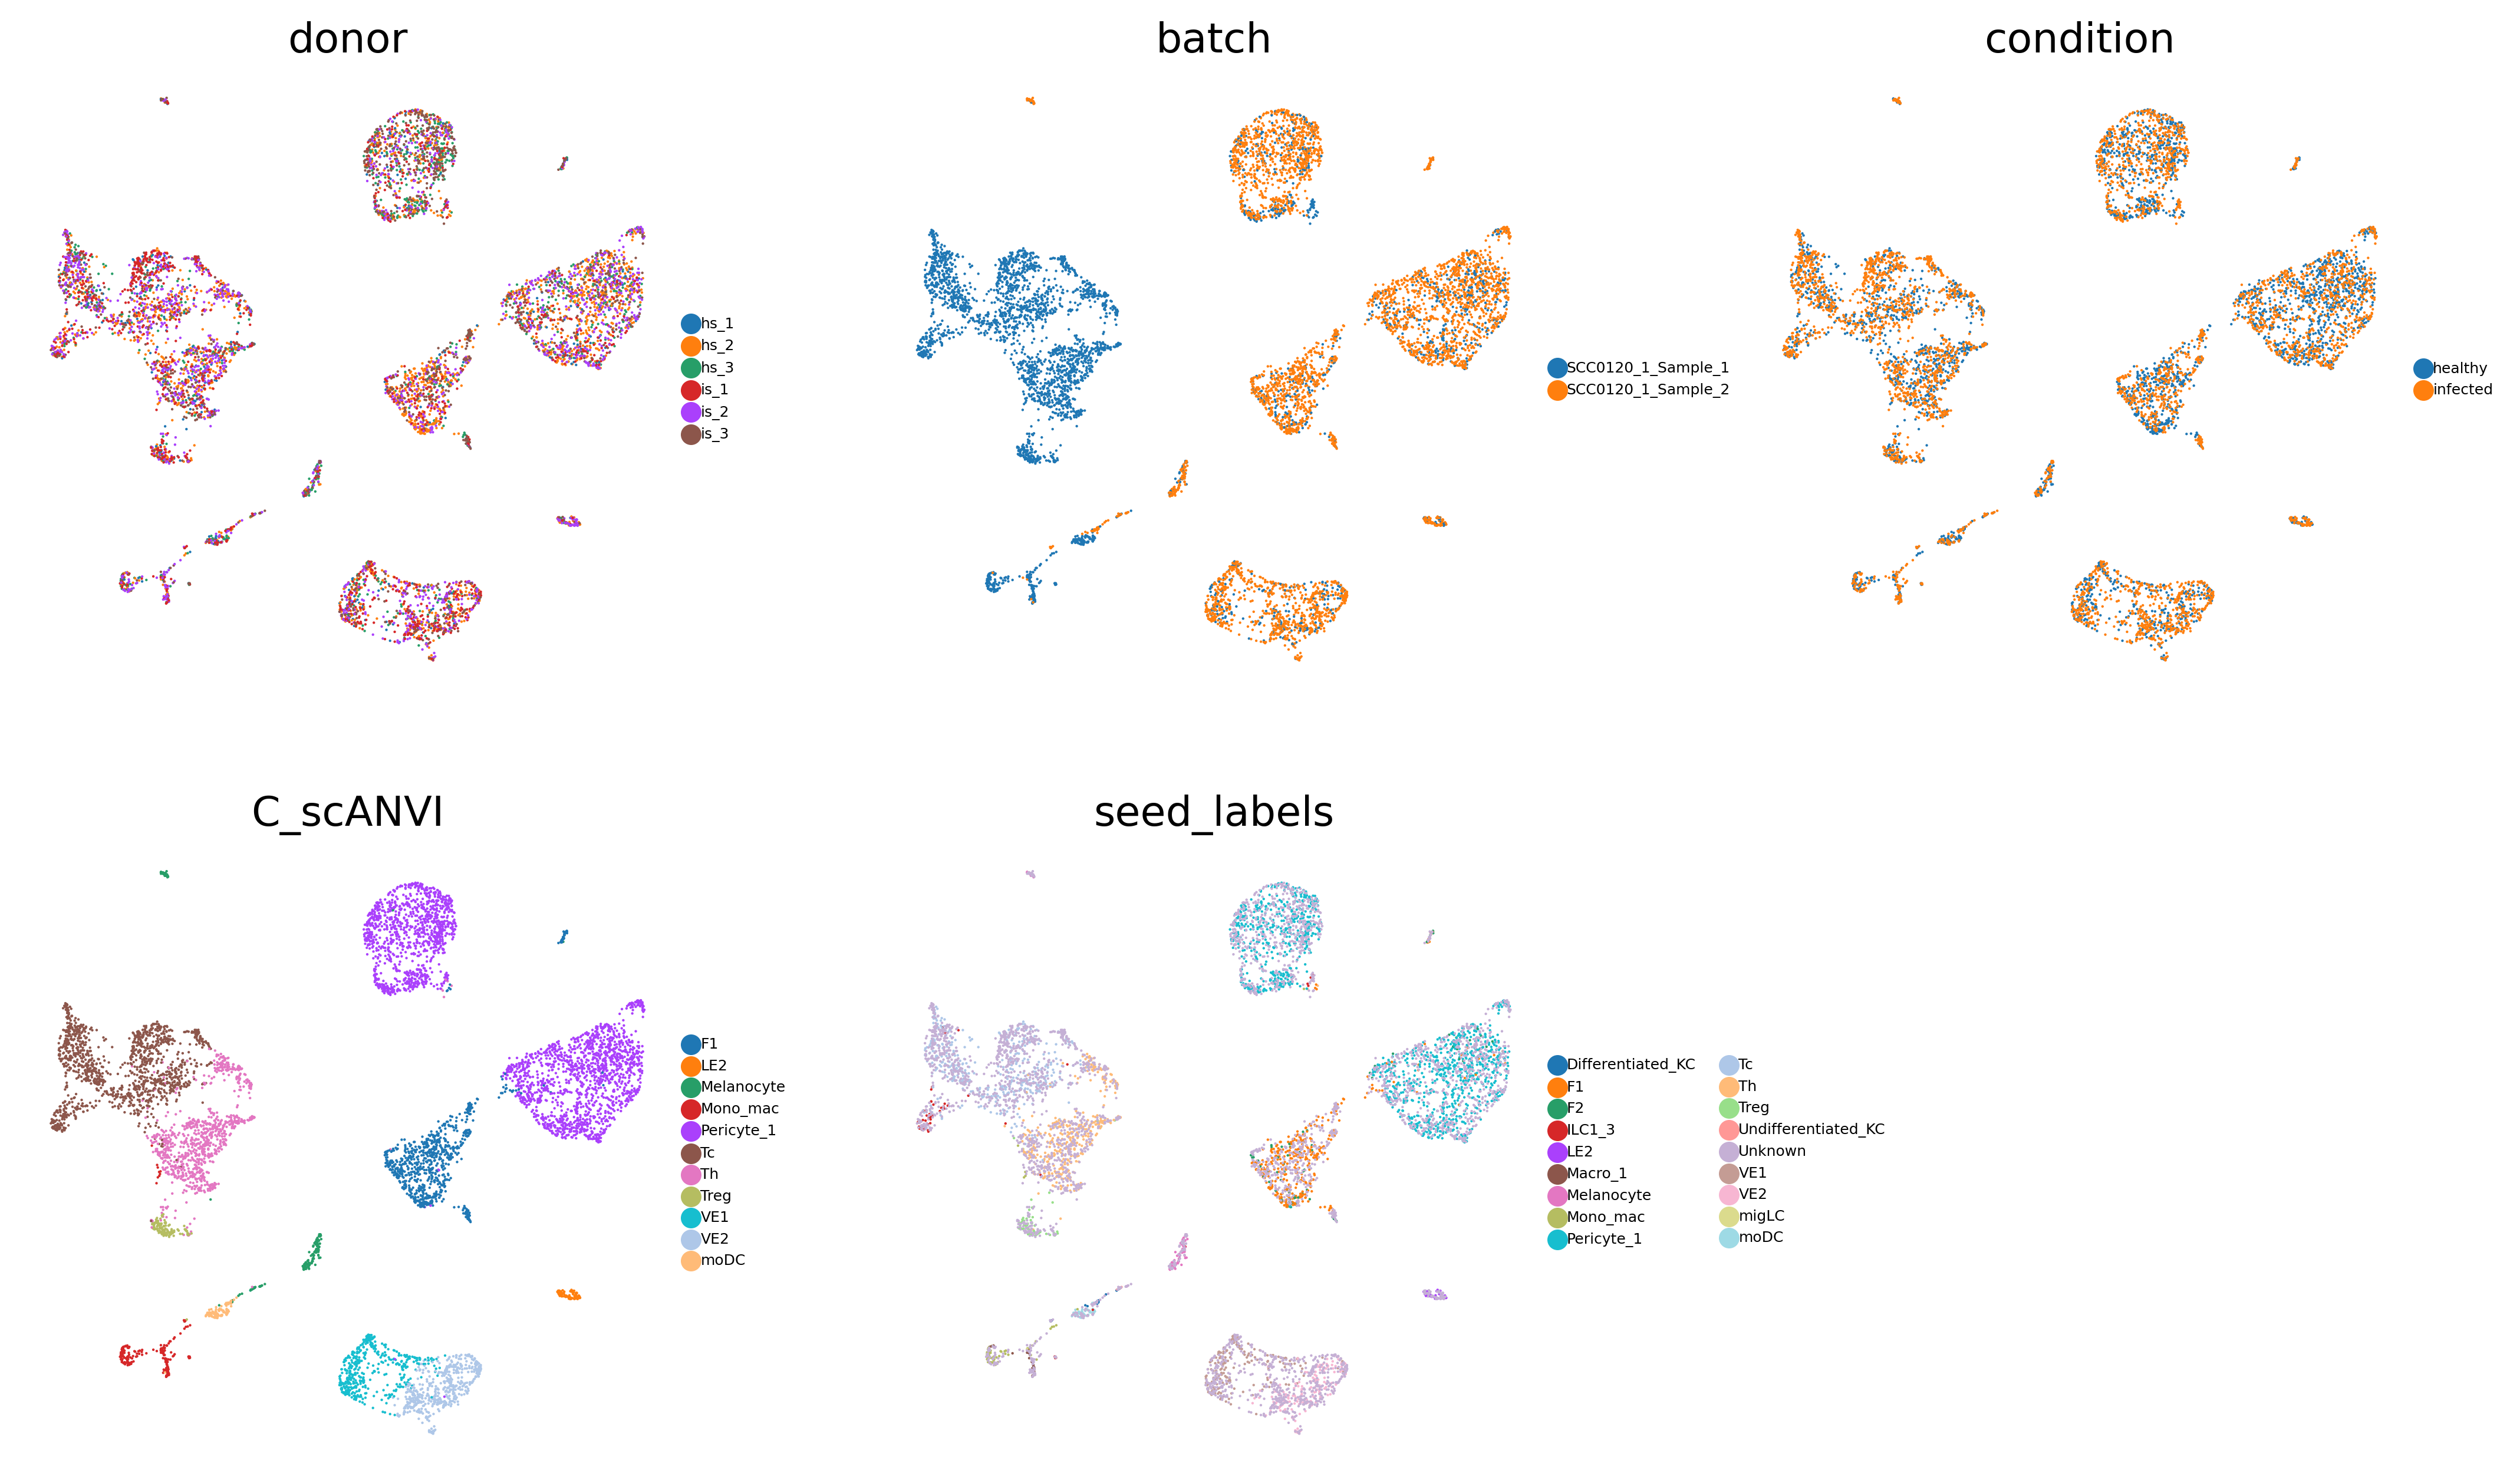

In [5]:
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'batch', 'condition', 'C_scANVI', 'seed_labels'], size = 3, legend_fontsize = 5, ncols = 3)

In [6]:
del(adata_skin.obs['seed_labels'])
adata_skin.obs['cell_type'] = adata_skin.obs['C_scANVI'].copy()

+ Normalize and log transform data

In [7]:
sc.pp.normalize_total(adata_skin, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_skin)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)


### Cluster with `leiden` and assessment with `SCCAF` 

* Resolution 0.5

In [ ]:
sc.pp.neighbors(adata_skin, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')

In [24]:
sc.tl.leiden(adata_skin, resolution = 0.5, random_state = 1712)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

* Resolution 0.6

In [26]:
sc.tl.leiden(adata_skin, resolution = 0.6, random_state = 1712)

running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

* Resolution 0.7

In [28]:
sc.tl.leiden(adata_skin, resolution = 0.7, random_state = 1712)

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

* Resolution 0.8

In [31]:
sc.tl.leiden(adata_skin, resolution = 0.8, random_state = 1712)

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

* Resolution 0.9

In [33]:
sc.tl.leiden(adata_skin, resolution = 0.9, random_state = 1712)

running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

### Cluster manifold using `leiden` - resolution 0.8

In [8]:
sc.pp.neighbors(adata_skin, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
sc.tl.leiden(adata_skin, resolution = 0.8, random_state = 1712)

computing neighbors


/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Cat

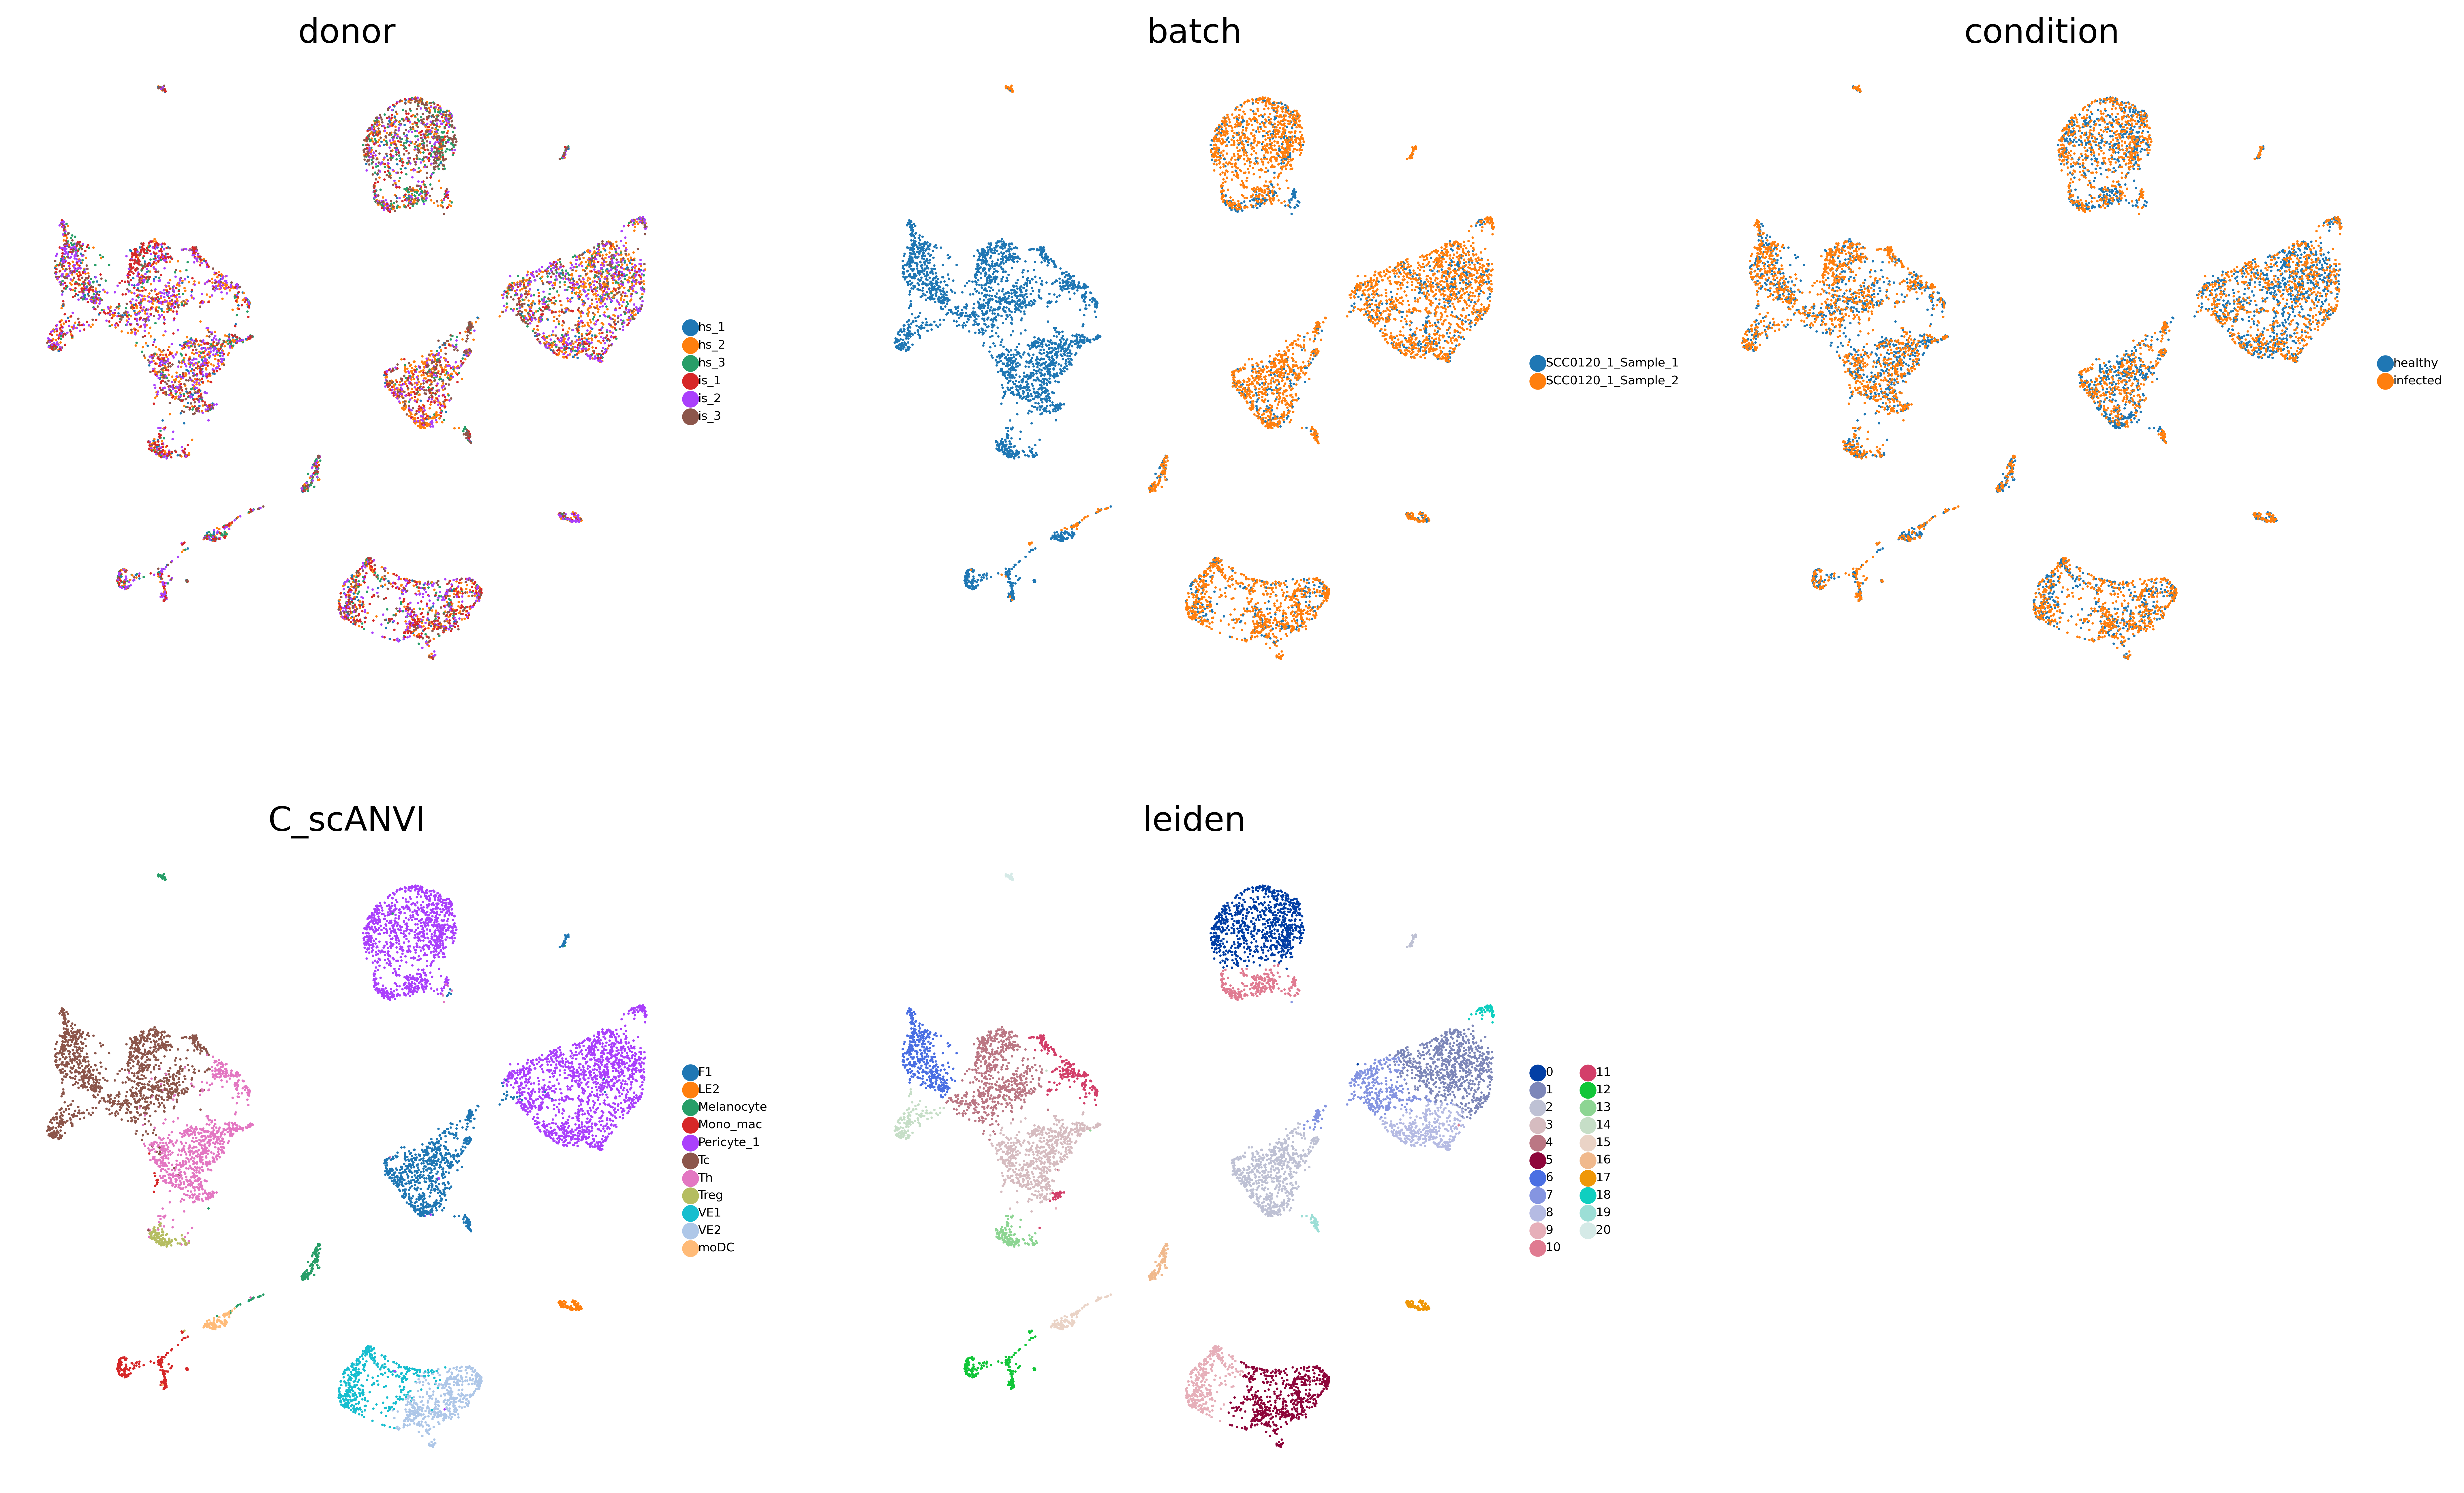

In [11]:
sc.set_figure_params(dpi=300, figsize=(5, 5))
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'batch', 'condition', 'C_scANVI', 'leiden'], size = 4, legend_fontsize = 5, ncols = 3)

### Evaluate clustering accuracy with `SCCAF`

In [38]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)

/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/SCCAF/__init__.py:249: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c_idx = df.groupby('class').apply(lambda x: msample(x, n=n, frac=frac)).index.get_level_values(None)
/home/amaguza/miniforge3/envs/sccaf2_env/lib/python3.9/site-packages/SCCAF/__init__.py:251: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return X[c_idx, :], X[d_idx, :], y[c_idx], y[d_idx]


Mean CV accuracy: 0.8962
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9078


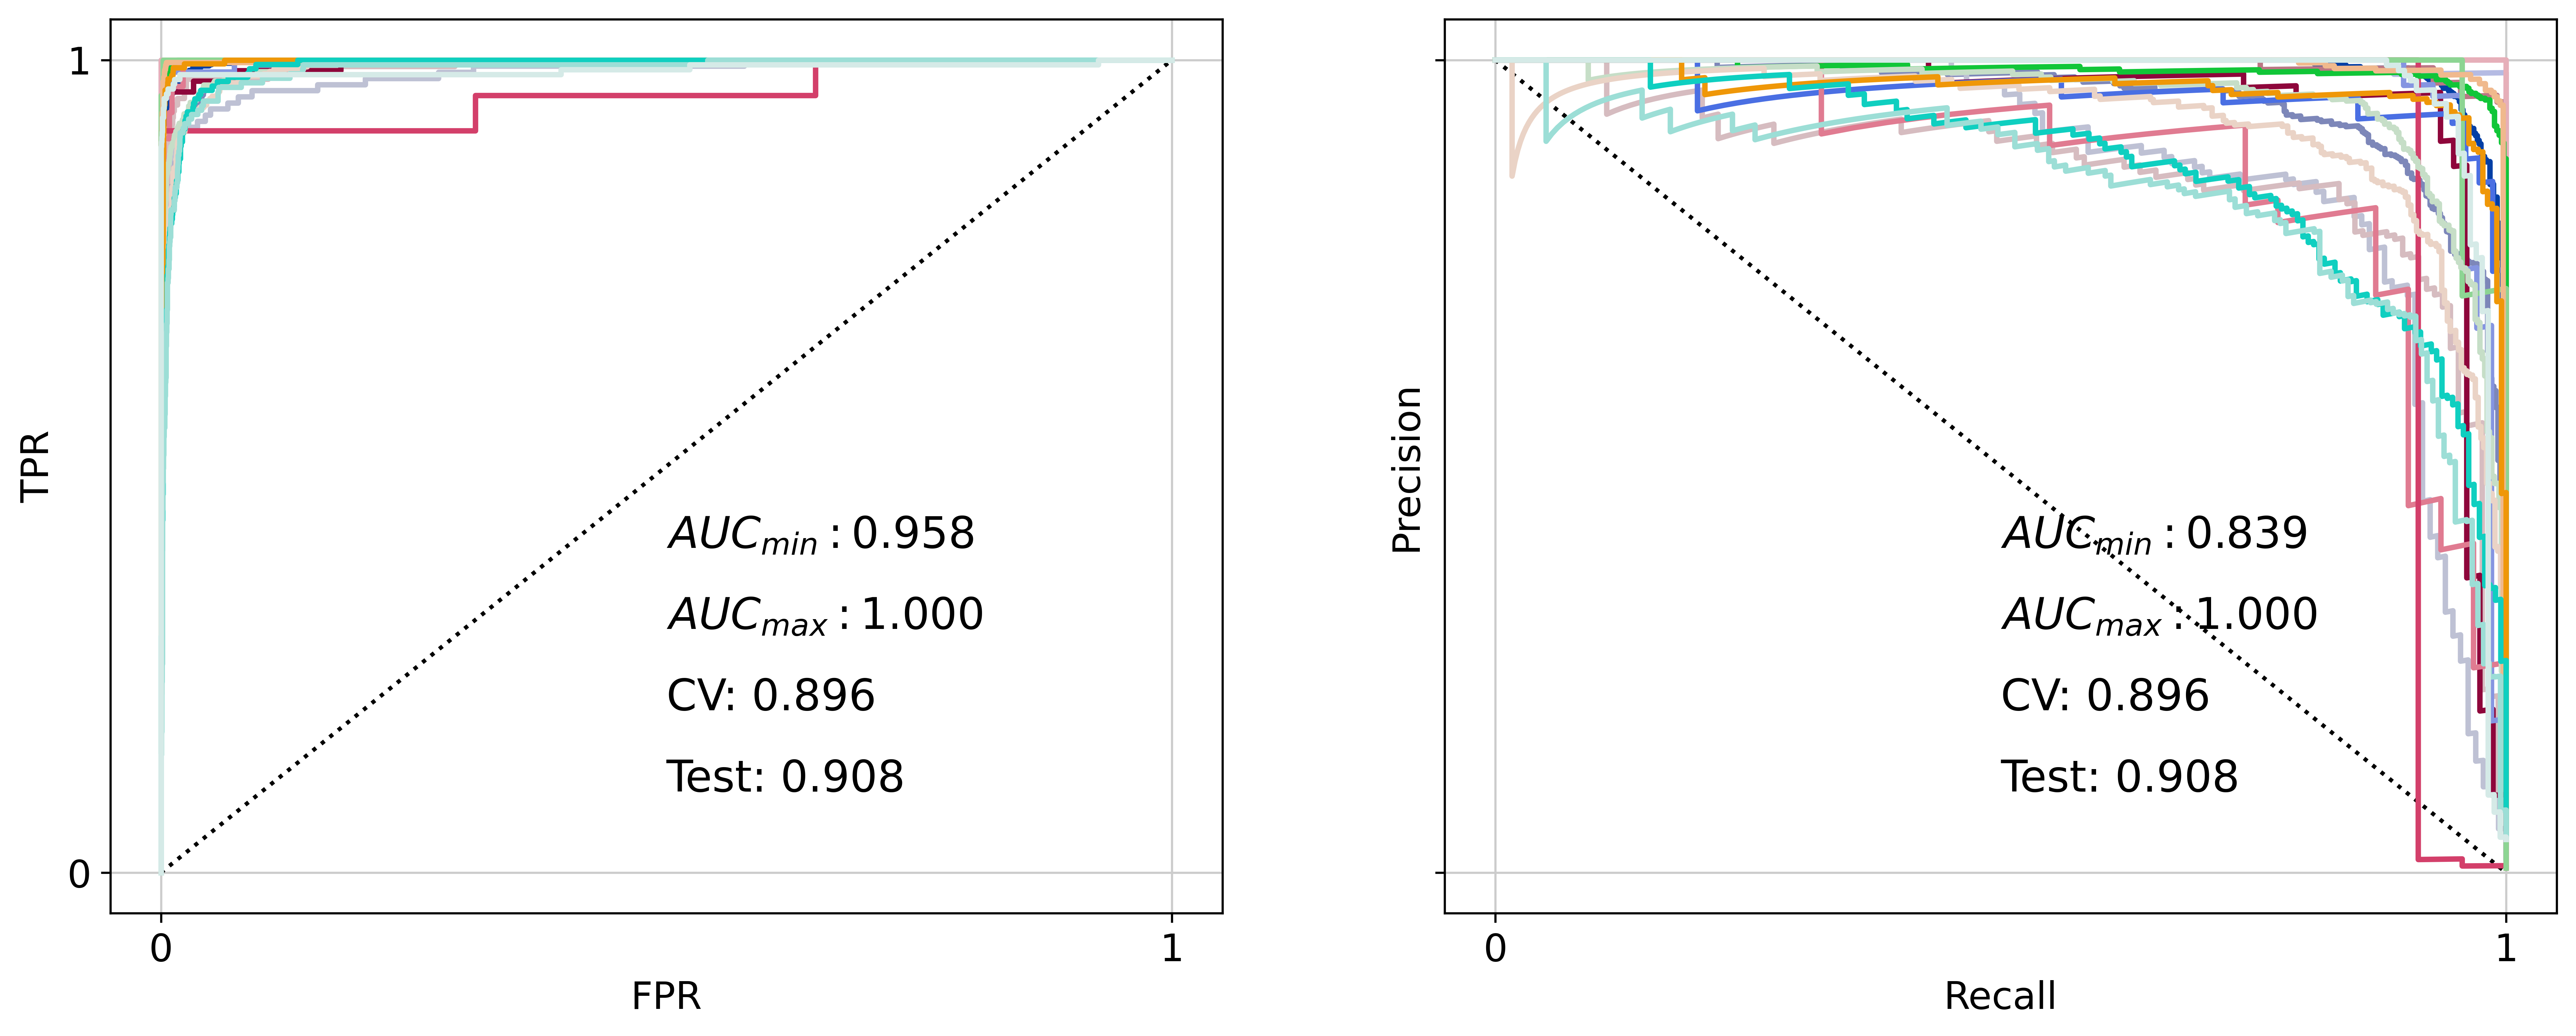

In [40]:
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

In [12]:
adata_skin = adata_skin.raw.to_adata()
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropout_by_counts-SCC0

In [14]:
adata_skin.write('data_skin/SCC0120_1_Skin_scANVI_leiden_Anna.h5ad')